<a href="https://colab.research.google.com/github/maykends/-Data_science_studies/blob/main/Machine_Learning_e_Data_Science_com_Python_de_A_%C3%A0_Z_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning e Data Science com Python(Classificacão)

# Importação das bibliotecas básicas

In [1]:
# biblioteca para gerar gráficos dinâmicos na versão mais recente usando o --upgrade
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 90.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [2]:
import pandas as pd 
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 

- ***Pandas*** é uma biblioteca que fornece estruturas de dados eficientes para manipulação e análise de dados, especialmente tabelas e séries temporais. Com Pandas, é possível ler, escrever e filtrar dados em diversos formatos, além de realizar operações estatísticas e de agregação.

- ***Numpy*** é uma biblioteca que fornece suporte para arrays e matrizes multidimensionais, bem como funções para operações numéricas com esses objetos. Ela é amplamente utilizada para cálculos científicos e computacionais em Python.

- ***Seaborn*** é uma biblioteca de visualização de dados baseada no Matplotlib, que fornece uma interface de alto nível para criação de gráficos estatísticos atraentes e informativos. Ela é especialmente útil para visualização de distribuições, relacionamentos e tendências em conjuntos de dados complexos.

- ***Matplotlib.pyplot*** é uma sub-biblioteca do Matplotlib que fornece funções para criação de gráficos e visualizações de dados. Ela é a biblioteca padrão para plotagem de dados em Python e oferece uma grande variedade de opções para personalização e formatação de gráficos.

- ***Plotly.express*** é uma biblioteca de visualização de dados interativa, que permite criar gráficos interativos em Python com poucas linhas de código. Ela oferece suporte a diversos tipos de gráficos, incluindo scatter plots, barras, mapas e mais, além de permitir a adição de interatividade como zoom e tooltips.

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

Conjunto de dados de Risco de Crédito. Este conjunto de dados contém colunas que simulam dados de bureau de crédito.

### Exploração dos dados

In [3]:
base_credit = pd.read_csv('/content/credit_data.csv') # Realizando a leitura

In [4]:
base_credit # Visualização da base

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


A ideia principal deste conjunto de dados é prever se o cliente vai pagar ou não pagar o empréstimo. Para realizar essa tarefa, é importante analisar o atributo "default", que indica se houve ou não inadimplência. Neste caso, a coluna "default" possui valores binários, onde "0" indica que o cliente pagou e "1" indica que o cliente não pagou o empréstimo.

As variáveis "clientid", "income", "age", "loan" são consideradas como atributos preditóres. Já a variável "default" indica o atributo Meta ou Classe da base de dados.

*Entendendo um pouco o contexto de cada variável*

- "clientid" é como se fosse o nome de um cliente como forma de indetificação
- "income" é a renda do cliente, no geral as bases de dados internacinais são consideradas a renda do cliente anual
- "age" indica a indade do cliente 
- "loan" indica a dívida que a pessoa possui 
- "default" indica 0 pagou e 1 não pagou o empréstimo

*Quais são os tipos de variáveis?*

- "clientid" é considerado uma variável "Nominal"
- "income" é considerado uma variável "Numérica" do tipo "Contínua"
- "age" é considerado uma variável "Numérica" do tipo "Contínua"
- "loan" é considerado uma variável "Numérica" do tipo "Contínua"
- "default" é considerado uma variável "Numérica" do tipo "Discreta"

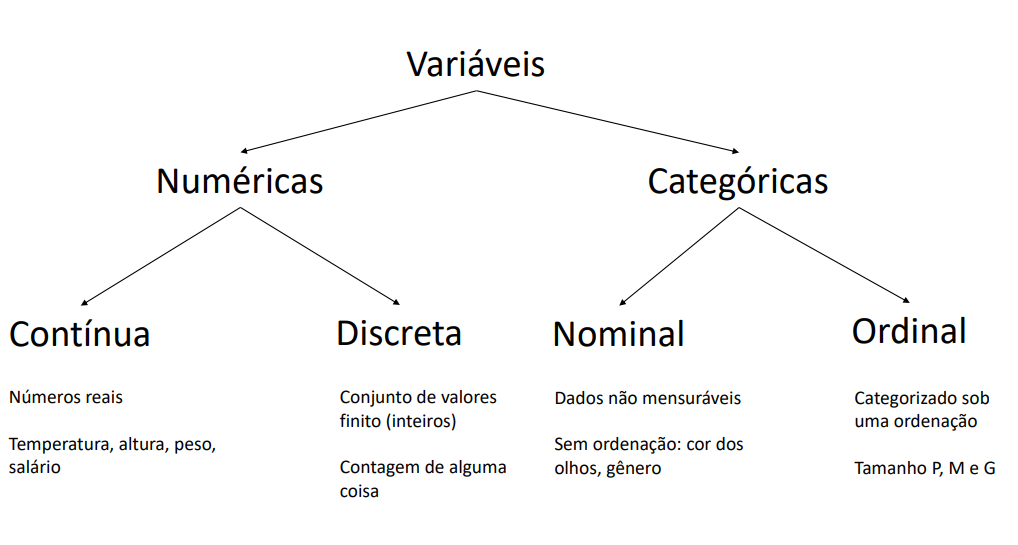

In [5]:
base_credit.head(10) # visualiza os 10 primeiros registros

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [6]:
base_credit.tail() # visualiza os 5 últimos registros

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


O método describe() do Pandas Python retorna um conjunto de estatísticas descritivas para cada coluna de um DataFrame. As estatísticas incluem:

- count: indica o número de valores não nulos (ou seja, a quantidade de observações/amostras) presentes na coluna.
- mean: indica a média aritmética dos valores na coluna.
- std: indica o desvio padrão dos valores na coluna, que mede a dispersão em torno da média.
- min: indica o menor valor presente na coluna.
- 25%: indica o primeiro quartil dos valores na coluna, ou seja, o valor abaixo do qual se encontra 25% dos dados.
- 50%: indica a mediana dos valores na coluna, ou seja, o valor que separa a metade inferior dos dados da metade superior.
- 75%: indica o terceiro quartil dos valores na coluna, ou seja, o valor abaixo do qual se encontra 75% dos dados.
- max: indica o maior valor presente na coluna.

In [7]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [8]:
# Realizando um filtro para saber a pessoa que mais ganha anualmente 
base_credit[base_credit['income'] == 69995.685578] 
#repare que o valor não aparece pelo fato que foi arredondado no describe. Assim, não retorna o valor exato

,clientid,income,age,loan,default


In [9]:
# Realizando mais um filtro para saber a pessoa que mais ganha anualmente >=
base_credit[base_credit['income'] >= 69995.685578] 

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [10]:
# Realizando filtro para saber a dívida mínima de uma pessoa 
base_credit[base_credit['loan'] <= 1.377630] 
# repare que é o cliente 865 da base de dados

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


### Visualização dos dados

In [11]:
np.unique(base_credit['default']) # Contar a os valores unicos que existe no atributo META

array([0, 1])

In [12]:
np.unique(base_credit['default'], return_counts=True) # retornar a quantidade = base de dados desbalanceada

(array([0, 1]), array([1717,  283]))

Repare que temos 1717 clientes que pagaram o empréstimo e 283 clintes que não pagam o empréstimo.

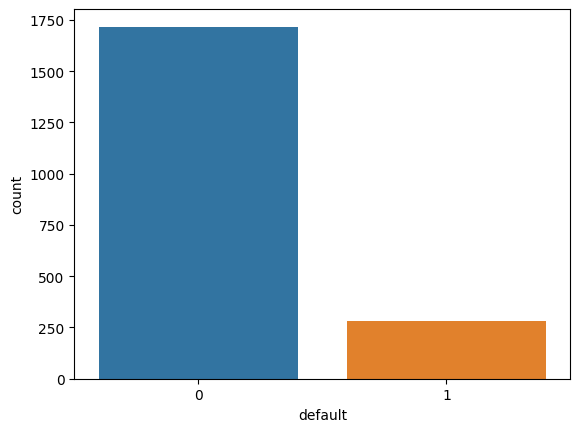

In [13]:
# sns.countplot(x = base_credit['default']) # faz a contagem de quantios registros existe em cada uma sobre a classe 

sns.countplot(x = base_credit['default']); # retorna apenas o gráfico

Histograma

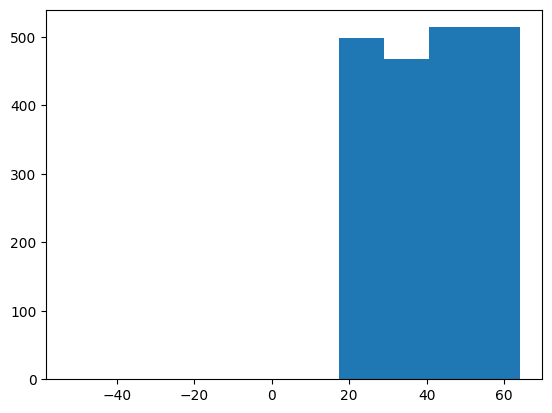

In [14]:
plt.hist( x = base_credit['age']); # Separando dos dados em intervalos de idade

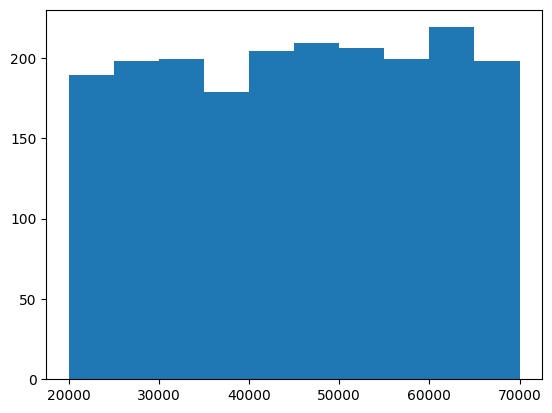

In [15]:
plt.hist ( x = base_credit['income']); # Indica a renda anual que vai de 20 mil a 70 mil por ano

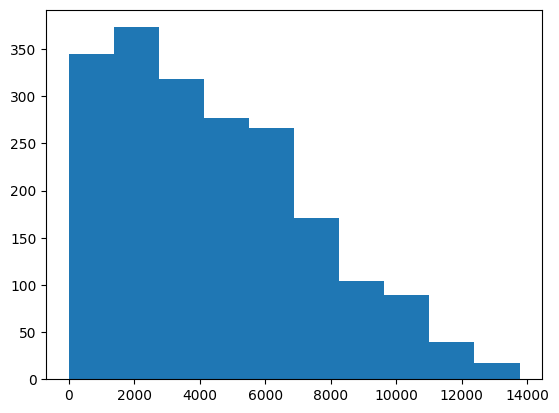

In [16]:
plt.hist( x = base_credit['loan']); # Dividas próxima do valor zero até o valor máximo próximo a 14 mil

# Indica que essa base de dados possui um pouco mais de 350 pessoas que tem uma dívida próximo de 2 mil a 3 mil
# Enquanto que a minoria das pessoas possuiem dividas entre 12 à 14 mil

In [17]:

# criando um gráfico dinamico com o intuito de comparar um atributo com outro atributo
grafico = px.scatter_matrix(base_credit, dimensions=['age']) # passando apenas o atributo age
grafico.show() # repare que o age se relaciona com ele mesmo no eixo "X" e eixo "Y"

In [18]:
# scatter_matrix indica um gráfico de dispersão, ou seja, coloca os pontos X e Y

grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income']) # Combinando age com income
grafico.show() 

In [19]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan']) # Combinando age com income e loan
grafico.show() 

In [20]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default') 
grafico.show() 

# Combinando age com income e loan e passando a classe 

### Tratamento de valores inconsistentes

In [21]:
# Retorna os valos negativos para idade
base_credit.loc[base_credit['age'] < 0] 

# método 01 para verificar dados inválidos

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [22]:
base_credit[base_credit['age'] < 0] 

# método 02 para verificar dados inválidos

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


Método 01 para resolver dados inconsistente:

- Apagar a coluna inteira (de todos os registros da base de dados)

In [23]:
# Apagar a coluna inteira (de todos os registros da base de dados)
base_credit2 = base_credit.drop('age', axis= 1) # deleta a todos os dados da coluna age
base_credit2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


Método 02 para resolver dados inconsistente

A segunda maneira é apagar somente os registros com valores inconsistentes ao invés de apagar a coluna.

In [24]:
base_credit.index # retorna todos os indices da base de daddos que vai de 0 a 2 mil

RangeIndex(start=0, stop=2000, step=1)

In [25]:
base_credit[base_credit['age'] < 0].index   # Retona os indices 15, 21 e 26 com os valores inconsistentes

Int64Index([15, 21, 26], dtype='int64')

In [26]:
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index) # Apagando somentes os registros inconsistentes
base_credit3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [27]:
base_credit3.loc[base_credit['age'] < 0] # Confirmando que realemte foi executado a segunda maneira

,clientid,income,age,loan,default


Método 03 para resolver dados inconsistente (MELHOR)

Nós temos a terceira maneira que essa é a melhor maneira que é recomendável preencher os valores inconsistentes manualmente, ou seja, você precisa acessar os dados desses três clientes e você vai buscar esses dados.

Por exemplo se você possui o contato desse cliente você pode ligar para esse cliente pedir informação para você fazer a atualização dos dados.

Esse é o processo mais confiável porque de fato você vai estar alimentando a base de dados com valores corretos e também vai evitar apagar registros de sempre quando você trabalha com aprendizagem de máquina.

É bem interessante que você sempre foque em outras maneiras de corrigir esses dados ao invés de apagar os dados pois os algoritmos de machine learning eles têm a tendência de terem melhores resultados quando

nós temos mais dados e se você apaga os dados pode de certa forma prejudicar o aprendizado dos algoritmos.

Método 04 para resolver dados inconsistente 

A quarta maneira que é mais usual para ser executada e preencher os valores faltantes com a média das idades.

In [28]:
base_credit.mean() # acessando a média de todos os registros

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [29]:
base_credit['age'].mean()

40.80755937840458

Média de todos os registros referente a idade, o proble é que está com os dados incosistentes. Para resolver, teremos que identificar a média sem os valroes negativos.

Calculando a média sem os valores negativos

In [30]:
base_credit['age'][base_credit['age'] > 0].mean() 
# Todos os registros sem as idades negativas, fazendo a média apenas nos registros positivos
# média correta 40.92770044906149

40.92770044906149

In [31]:
base_credit.loc[base_credit['age'] < 0] # verificar quais são os registros negativos

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [32]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92 # Inserindo o valor da média das idades no valor de 40.92

In [33]:
base_credit.loc[base_credit['age'] < 0] # verificar se ainda possui valor negativo

,clientid,income,age,loan,default


In [34]:
base_credit.head(28)  # Idades corrigidas

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


### Tratamento de valores Faltantes

In [35]:
base_credit.isnull() # insnull para identificar se há valroes faltantes dentro da base de dados

# TRUE indica valor faltante, ou seja, o valor não foi preenchido

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [36]:
base_credit.isnull().sum() # Faz o somatório dos valores faltantes na base de dados
# Repare que só aparecem 3 valores para o atributo 'age'

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [37]:
base_credit.loc[pd.isnull(base_credit['age'])] # Verifica os valores nulos com um filtro no atributo

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


Possíveis soluções

- Preenchimento da média


In [38]:
# 
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

# fillna indica que o "fill" vem de preencher e o "na" preencher os valores nulos
# base_credit['age'].mean() indica a média da idade
# inplace = True faz alteração da base sem executar apenas na memoria


In [39]:
base_credit.loc[pd.isnull(base_credit['age'])]  # indica que não há mais valores faltantes

,clientid,income,age,loan,default


Filtrando pelos registros que antes eram dados faltantes

In [40]:
base_credit.loc[(base_credit['clientid'] == 29) | (base_credit['clientid'] == 31) | (base_credit['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


De uma maneira mais simples

In [41]:
base_credit.loc[base_credit['clientid'].isin([29,31,32])] # Filtrando pelos registros que antes eram dados faltantes

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


### Divisão entre previsores e classe

Objetivo é utilizar a renda a idade e o valor da dívida que são dados históricos para fazermos a previsão dos dados.

In [42]:
type(base_credit) # é um dataframe do pandas

pandas.core.frame.DataFrame

In [43]:
x_credit = base_credit.iloc[:, 1:4].values  

# iloc[:] seleciona todas as linhas do dataframe
# iloc[:,] indica as colunas
# iloc[:, 1:4] indica as colunas que vamos selecionar, não tem sentido usar 'clientid'.
# Portanto seleciona apenas as colunas de 1 ao 4  que vai retornar os previsores 'income','age'	e 'loan'
# iloc[:, 1:4].values  indica "conversão" para o numpy

In [44]:
x_credit # dados em notação científica

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [45]:
type(x_credit) # convertido para numpy

numpy.ndarray

In [46]:
y_credit = base_credit.iloc[:, 4].values  # captura apenas a coluna META

In [47]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [48]:
type(y_credit) # formato numpy array

numpy.ndarray

### Escalonamento dos Atributos

In [49]:
x_credit  # Atributos previdores

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [50]:
x_credit[:, 0].min(), x_credit[:, 1].min(), x_credit[:, 2].min()

# x_credit[:, ] acessa todas as linhas
# x_credit[:, ] acessa todas as linhas da coluna 0 da base x_credit
# x_credit[:, 0].min() indentificar o menor valor "Renda" que é o 'income'

# x_credit[:, 1].min() indentificar a pessoa mais nova
# x_credit[:, 2].min() indica a menor dívida

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [51]:
x_credit[:, 0].max(), x_credit[:, 1].max(), x_credit[:, 2].max() 

# indentificar o maior valor "Renda" que é o 'income'
# x_credit[:, 1].max() indentificar a pessoa mais velha
# x_credit[:, 2].max() indica a maior dívida


(69995.6855783239, 63.971795841120205, 13766.0512393337)

Perceba que existe uma diferença bem grande na escala dos valores.Se nós compararmos a renda com a idade a maior idade é de somente 63 enquanto que a maior renda é de 69 mil. A diferença entre esses valores é muito grande.

Isso pode ser um problema para os algoritmos de machine learning principalmente algoritmos baseados em distância como por exemplo o algoritmo que você vai aprender logo na sequência e também em redes neurais artificiais.

Portanto o ideal é que aplique uma fórmula para fazer a padronização desses valores para que eles acabem ficando na mesma escala.

Outro problema que pode acontecer com alguns algoritmos é que como os valores da renda são muito maiores do que os valores da idade o algoritmo pode considerar que a renda é muito mais importante do que a idade ou que a dívida é mais importante que a idade. Pois esses valores são muito maiores. O algoritmo pode deixar que os atributos mais importantes possuem os maiores valores. Portanto é importante deixar todos os valores na mesma escala.

Existem basicamente dois cálculos que nós podemos aplicar o primeiro é chamado da padronização standard e o segundo é a normalização normalize.

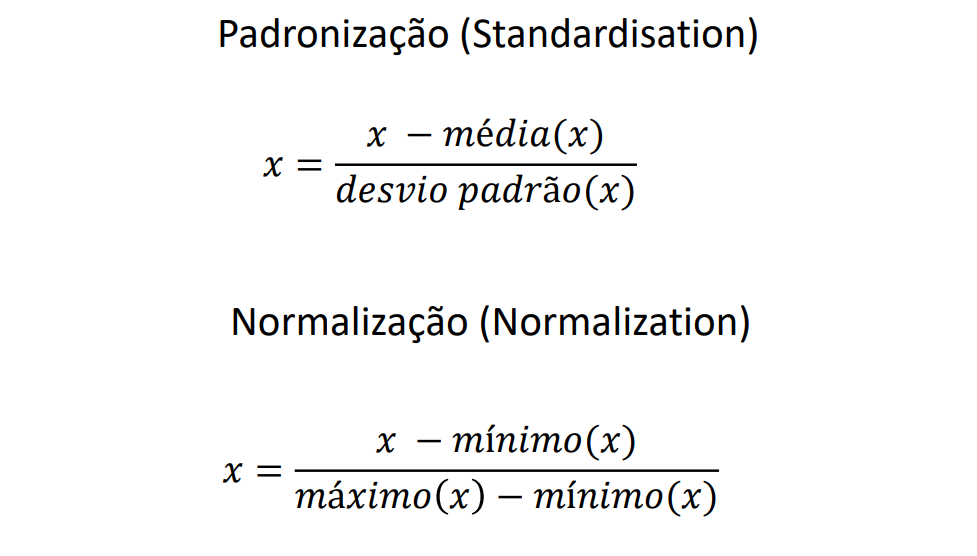

A **padronização** e a **normalização** são técnicas comumente usadas no pré-processamento de dados em machine learning para melhorar o desempenho de certos algoritmos e garantir uma representação consistente dos dados. Aqui estão algumas diretrizes gerais sobre quando usar a padronização e a normalização:

**Padronização (Standardization)**:

- Use a **padronização** quando os dados não seguem uma distribuição normal (gaussiana) e têm diferentes escalas.
- Para essa base de dados tinhamos outliers em 3 registros do atributo 'age' com valores negativos.
- Algoritmos que se beneficiam da padronização incluem regressão linear, regressão logística, análise discriminante linear e máquinas de vetores de suporte (SVM).
Normalização (Normalization):

- Use a **normalização** quando a escala dos dados é variada, e você deseja trazer todas as características para uma faixa específica, como [0, 1] ou [-1, 1].

- Algoritmos como redes neurais, algoritmos baseados em distância (k-means, k-nearest neighbors) e algoritmos que usam gradientes (por exemplo, gradient boosting, redes neurais convolucionais) podem se beneficiar da normalização.
É importante observar que nem todos os algoritmos exigem a padronização ou normalização dos dados. Alguns algoritmos, como árvores de decisão e florestas aleatórias, não são afetados pela escala dos dados e podem trabalhar diretamente com os valores brutos.

Além disso, é essencial considerar o contexto e o domínio do problema. Em alguns casos, a padronização ou a normalização podem não ser necessárias ou até mesmo prejudicar o desempenho do modelo. Portanto, é sempre recomendável experimentar diferentes abordagens e avaliar o impacto nos resultados do modelo.



In [52]:

from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler() # criando a variável com um objeto dessa classe StandardScaler()
x_credit =  scaler_credit.fit_transform(x_credit) # aplicando a tranformação dos dados para uma padronização da base x_credit


# sklearn é a biblioteca padrão para trabalharmos com algoritmos de aprendizagem de máquina
# preprocessing é o pacote 
# StandardScaler é responsável por aplicar a padronização


In [53]:
# Repare que temos valores na mesma escala
x_credit[:, 0].min(), x_credit[:, 1].min(), x_credit[:, 2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [54]:
# Repare que temos valores na mesma escala
x_credit[:, 0].max(), x_credit[:, 1].max(), x_credit[:, 2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

Essa foi a última etapa do pre-processamento da base de dados credit_data.

### Base de Dados Censo

Repositório para base de dados Censo

http://archive.ics.uci.edu/ml/datasets/adult

### Exploração dos Dados

In [55]:
base_census = pd.read_csv('/content/census.csv')

In [56]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Attribute Information:**

Listing of attributes:

>50K, <=50K.

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: continuous.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


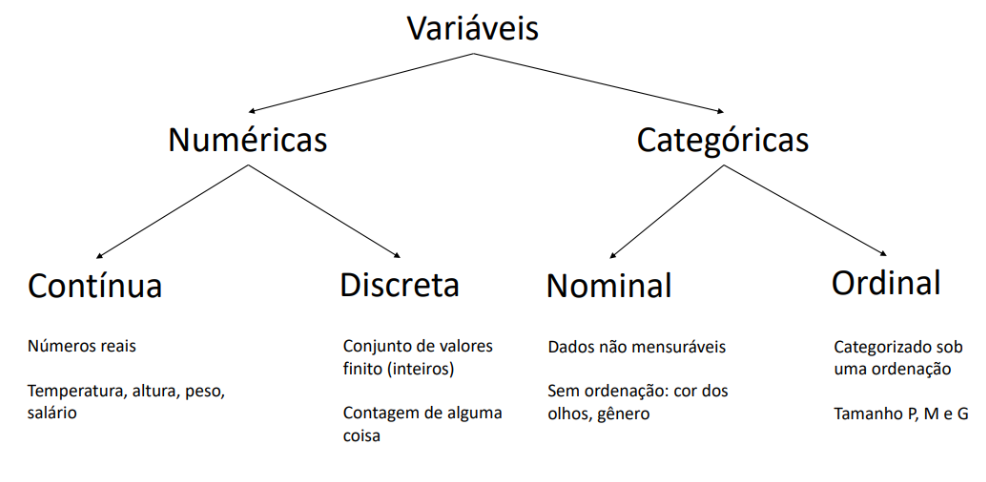

In [57]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [58]:
base_census.isnull().sum() # verifica se há valores faltantes. Indica que não há nenhum valro faltante

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

# Visualização dos Dados